Lambda School Data Science

*Unit 2, Sprint 1, Module 4*

---

In [213]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Libraries for today's project
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Part 1: Sprint Challenge Practice

- Can I import a CSV file into a DataFrame?
- Can I create a scatter plot?
- Can I split a DataFrame into a target vector and feature matrix?
- Can I split a dataset into a training set and a test set?
- Can I establish the baseline mean absolute error for a regression problem?
- Can I combine transformers with a predictor using a pipeline?
- Can I build a linear regresion model and a ridge regression model?
- Can I evaluate a model using common metrics like mean absolute error, root mean squared error, and R^2?
- If given a feature matrix, can I use my model to create a list of predictions?
- Can I create a horizontal bar chart with the coefficients from a linear model?

# Part 2: Pipelines and Plotting

Let's revise [our work from yesterday](https://tinyurl.com/yb9cz6n5).

# Part 3: Logistic Regression

# I. Wrangle Data

In [214]:
import pandas as pd
train = pd.read_csv(DATA_PATH + 'titanic/train.csv', index_col='PassengerId') 
test = pd.read_csv(DATA_PATH + 'titanic/test.csv', index_col='PassengerId') 

## Peform EDA

In [215]:
print(train.shape) # Has the target vector
print(test.shape) # Does not have the target vector

(891, 11)
(418, 10)


In [216]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [217]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [218]:
train.select_dtypes('object').nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [219]:
#Make our wrangle function
def wrangle(df):
  df = df.copy()
  df.drop(columns =['Name', 'Ticket', 'Cabin'], inplace = True)
  return df

In [220]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [221]:
train = wrangle(train)
test = wrangle(test)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [222]:
train['Survived'].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

## II. Split Data

In [223]:
target = 'Survived'
y = train[target]
X = train.drop(columns = target)

Since there's no time series component, we should do a randomized train-validation split.

In [224]:
#perform a randomized train-validation split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, random_state = 42)

## III. Establish our baseline

- This is a **classification problem**, so we look at the **majority class** to calculate baseline **accuracy score**.

In [225]:
# This is a classification problem, for that reason, a baseline metric will be accuracy score
# whqt is your majority  class inthe target
print('Baseline accuracy:', y_train.value_counts(normalize = True).max())

Baseline accuracy: 0.6235955056179775


## IV. Build Model

- Why would regular linear regression not work here?

In [226]:
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression


What we need for our model pipeline:

- `OneHotEncoder`
- `SimpleImputer`
- `LogisticRegression`

In [227]:
# in your pipeline you should have only one predictor and 
model_lin = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    LinearRegression()
)

In [228]:
model_lin.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [229]:
#XT_train = model_lin.fit_transform(X_train)
#XT_train

In [230]:
model_lin.named_steps['onehotencoder'].get_feature_names()

['Pclass',
 'Sex_male',
 'Sex_female',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked_S',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_nan']

In [231]:
#pd.DataFrame(XT_train, columns = model_lin.named_steps['onehotencoder'].get_feature_names()).head()

## V. Check Metrics

In [232]:
#two ways to check
# Use skleaarn
#use bar score
#from sklearn.metrics import accuracy_score
print('Training accuracy score:', model_lin.score(X_train, y_train))
print('Validation accuracy score:', model_lin.score(X_val, y_val))

Training accuracy score: 0.38351734071668986
Validation accuracy score: 0.4443105469376068


In [233]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'Survived')

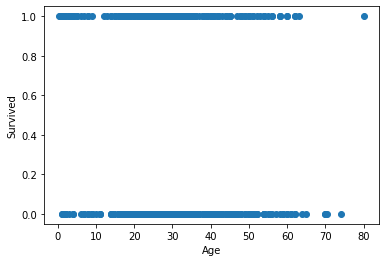

In [240]:
plt.scatter(X_train['Age'], y_train)
plt.xlabel('Age')
plt.ylabel('Survived')

## Build out Logistic Regression Model

In [241]:
model_log = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression()
)
model_log.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [236]:
# Check logistic regression metrics
print('Training accuracy score:', model_log.score(X_train, y_train))
print('Validation accuracy score:', model_log.score(X_val, y_val))

Training accuracy score: 0.8019662921348315
Validation accuracy score: 0.8100558659217877


In [237]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


## Make predictions

In [238]:
y_pred = model_log.predict(test)

In [239]:
submission = pd.DataFrame(y_pred, columns = ['Survived'], index = test.index)
submission.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [243]:
submission.to_csv('my_sub.csv')